# Assignment 2 - version 4 remove outlier by IQR

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import statsmodels as s
from itertools import repeat
import scipy.stats as stats

# Section 0
#### Load and Clean data

In [2]:
AimoScore = pd.read_excel('./AimoScore/AimoScore_WeakLink_big_scores.xls')
data = AimoScore[~AimoScore.isin(['?'])]
data = data.dropna(axis=0)
df = pd.DataFrame(data)
#print(df)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(1362, 42)

In [3]:
df.describe()

,AimoScore,No_1_Angle_Deviation,No_2_Angle_Deviation,No_3_Angle_Deviation,No_4_Angle_Deviation,No_5_Angle_Deviation,No_6_Angle_Deviation,No_7_Angle_Deviation,No_8_Angle_Deviation,No_9_Angle_Deviation,...,No_19_NASM_Deviation,No_20_NASM_Deviation,No_21_NASM_Deviation,No_22_NASM_Deviation,No_23_NASM_Deviation,No_24_NASM_Deviation,No_25_NASM_Deviation,No_1_Time_Deviation,No_2_Time_Deviation,EstimatedScore
count,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,...,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000
mean,0.611221,0.522195,0.489690,0.545800,0.474728,0.502889,0.435118,0.517531,0.613025,0.497030,...,0.692998,0.684753,0.679556,0.632913,0.681144,0.648808,0.527369,0.488769,0.486795,0.410152
std,0.221718,0.232319,0.273931,0.210870,0.244130,0.262787,0.245057,0.255537,0.137213,0.265956,...,0.049962,0.061008,0.071570,0.125202,0.064690,0.122493,0.217322,0.277749,0.276492,0.263560
min,0.010000,0.279770,0.092300,0.346724,0.188905,0.163080,0.140124,0.194165,0.521760,0.156385,...,0.670971,0.656624,0.642276,0.552846,0.648972,0.578192,0.308943,0.148733,0.151124,0.000478
25%,0.463945,0.279770,0.244978,0.346724,0.212578,0.240674,0.201578,0.255141,0.521760,0.236370,...,0.670971,0.656624,0.642276,0.552846,0.648972,0.578192,0.308943,0.209589,0.211621,0.179460
50%,0.655368,0.472740,0.481349,0.475610,0.456958,0.497609,0.403396,0.513391,0.521760,0.487088,...,0.670971,0.656624,0.642276,0.552846,0.648972,0.578192,0.475132,0.458871,0.445481,0.385701
75%,0.779572,0.716165,0.721425,0.726805,0.680297,0.728718,0.626136,0.737805,0.698350,0.724892,...,0.670971,0.656624,0.677786,0.697991,0.665591,0.675634,0.707198,0.733859,0.734099,0.619560
max,0.986886,0.998565,0.998565,1.000000,0.989957,1.000000,1.000000,0.999522,0.996174,1.000000,...,0.871353,0.892874,0.910569,0.979914,0.902439,1.000000,1.000000,1.000000,1.000000,0.983740


#### Draw Histogram

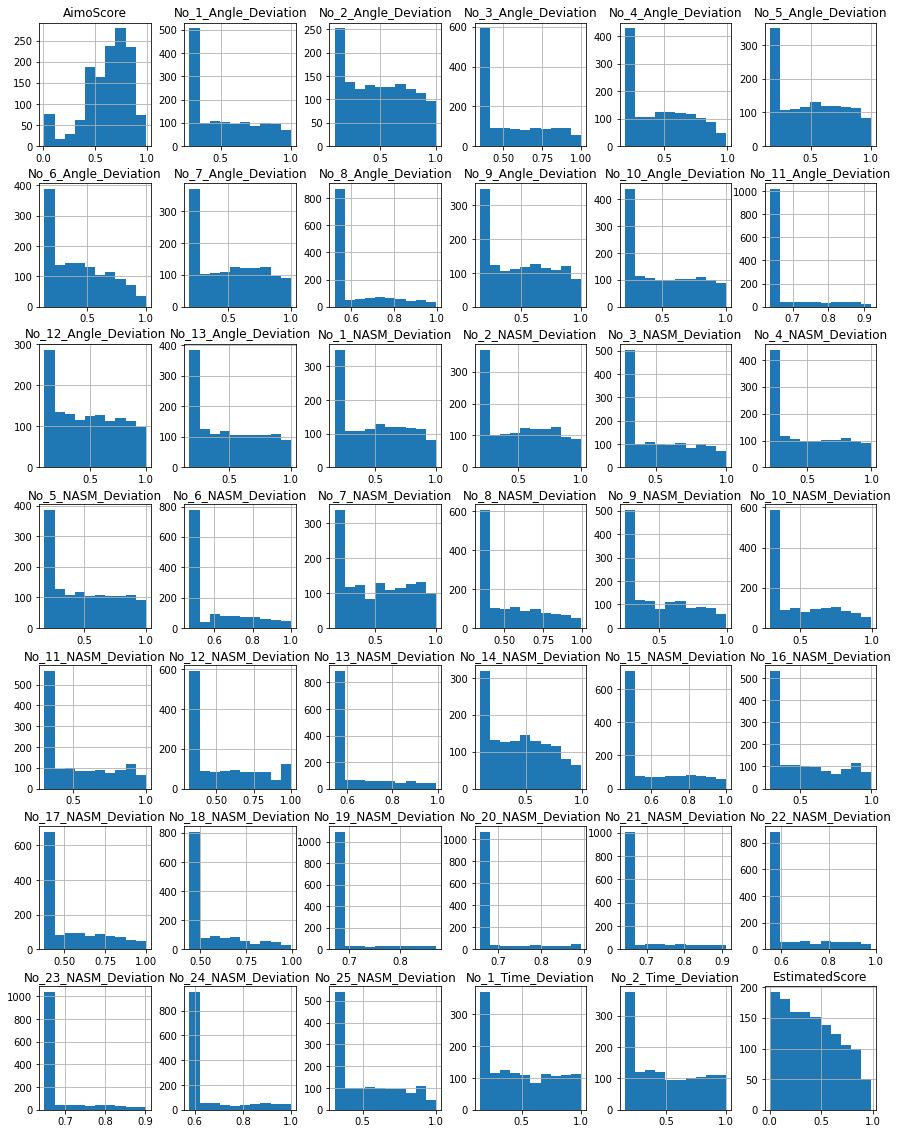

In [4]:
df.hist(figsize = (15, 20))
plt.show()

#### Check correlation using corrMatrix and Heatmap

In [5]:
corrMatrix = df.corr()
corrMatrix['AimoScore']
print (corrMatrix)

                       AimoScore  No_1_Angle_Deviation  No_2_Angle_Deviation  \
AimoScore               1.000000             -0.045044             -0.015535   
No_1_Angle_Deviation   -0.045044              1.000000              0.468316   
No_2_Angle_Deviation   -0.015535              0.468316              1.000000   
No_3_Angle_Deviation   -0.108487              0.101071              0.019457   
No_4_Angle_Deviation   -0.048405              0.214720              0.220476   
No_5_Angle_Deviation   -0.264605             -0.065251             -0.113344   
No_6_Angle_Deviation   -0.217485              0.025070              0.074172   
No_7_Angle_Deviation   -0.220184             -0.119709             -0.144332   
No_8_Angle_Deviation   -0.257127              0.260507              0.326995   
No_9_Angle_Deviation   -0.272252             -0.012169             -0.048157   
No_10_Angle_Deviation  -0.375551             -0.131151             -0.222131   
No_11_Angle_Deviation  -0.261116        

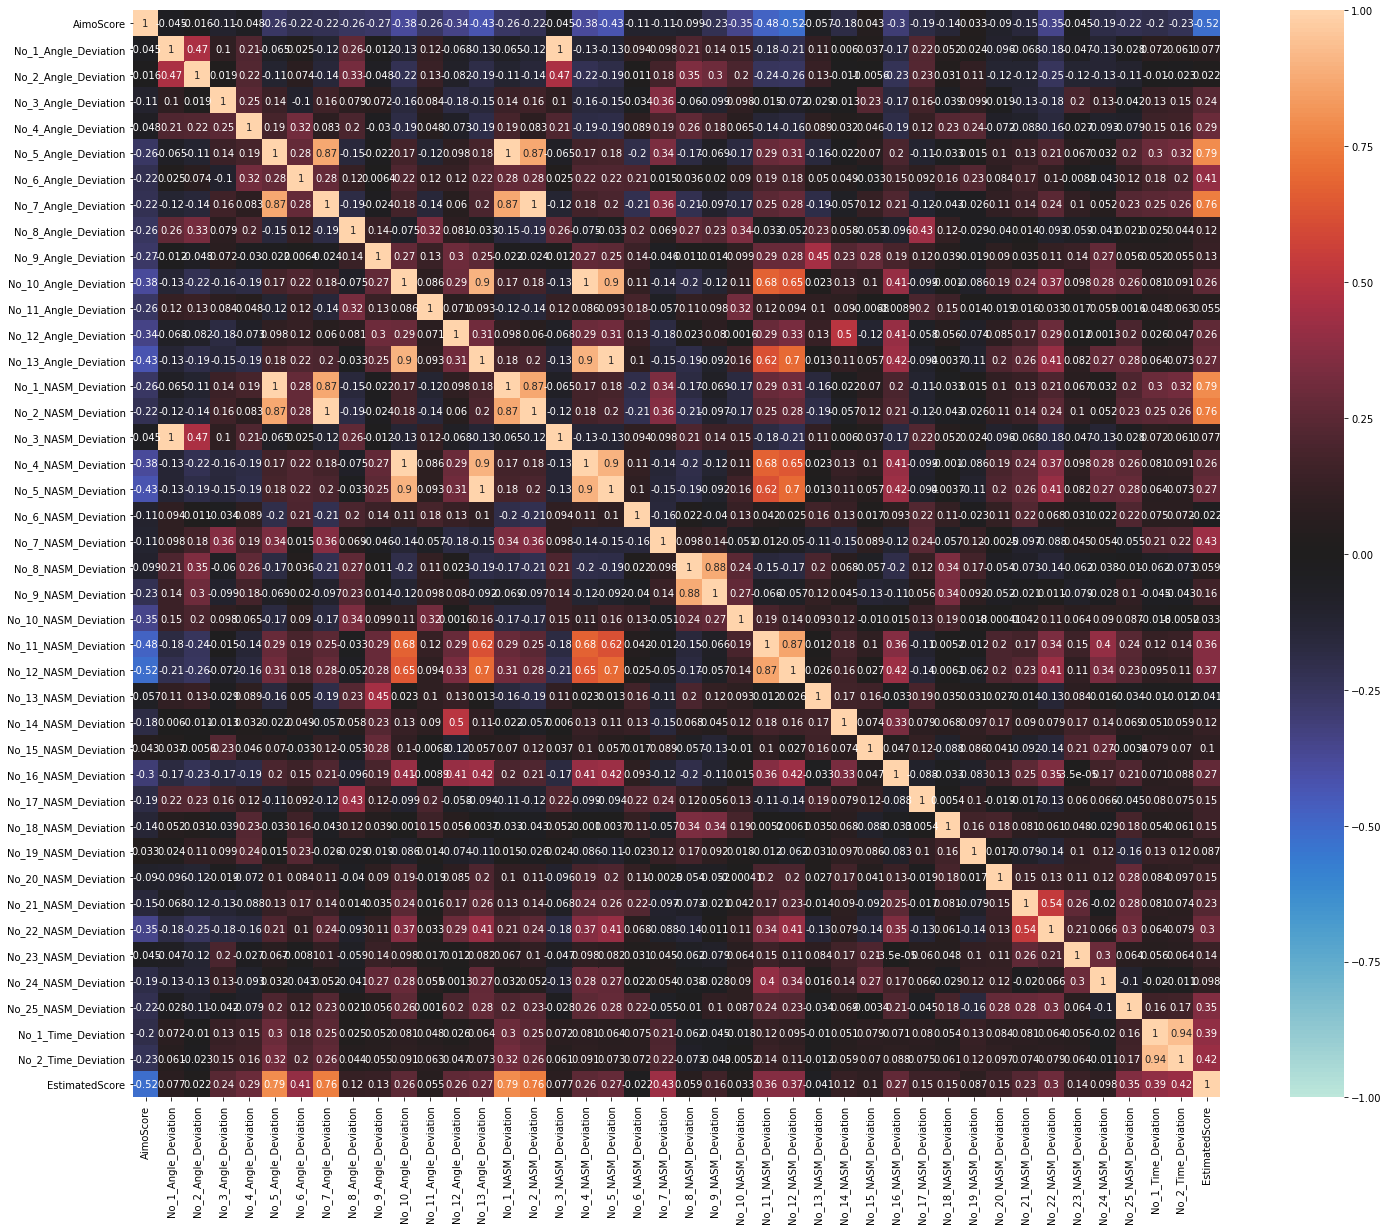

In [6]:
fig, ax = plt.subplots(figsize=(25,20)) 

#sns.heatmap(corrMatrix)

ax = sns.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    square=True,
    annot=True
)

plt.show()

#### Draw pairplots

In [7]:
x = list(df)
x1 = x[1:6]
x2 = x[7:12]
x3 = x[13:18]
x4 = x[19:24]
x5 = x[25:30]
x6 = x[31:36]
x7 = x[37:42]

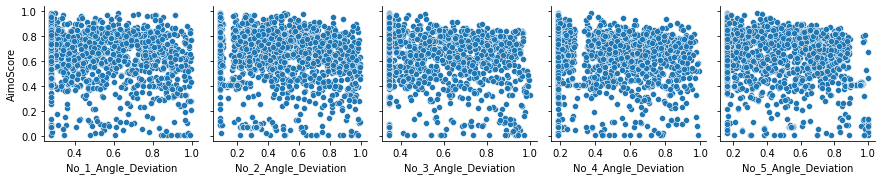

In [8]:
sns.pairplot(data=df,
                  y_vars=['AimoScore'],
                  x_vars=x1)

plt.show()

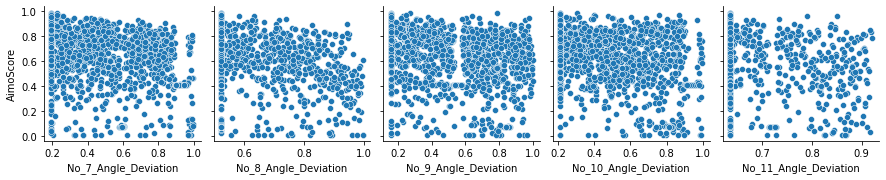

In [9]:
sns.pairplot(data=df,
                  y_vars=['AimoScore'],
                  x_vars=x2)

plt.show()

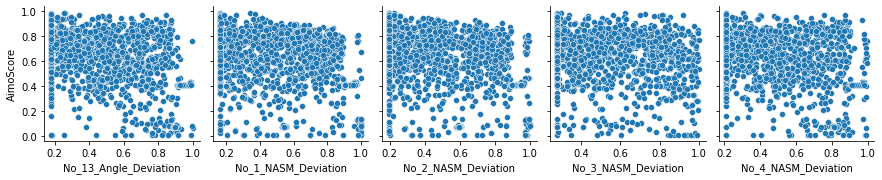

In [10]:
sns.pairplot(data=df,
                  y_vars=['AimoScore'],
                  x_vars=x3)

plt.show()

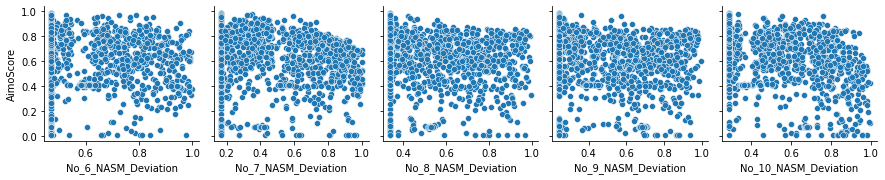

In [11]:
sns.pairplot(data=df,
                  y_vars=['AimoScore'],
                  x_vars=x4)

plt.show()

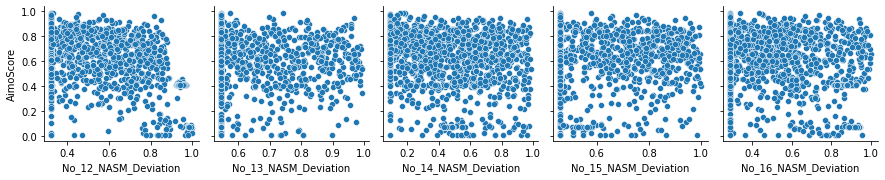

In [12]:
sns.pairplot(data=df,
                  y_vars=['AimoScore'],
                  x_vars=x5)

plt.show()

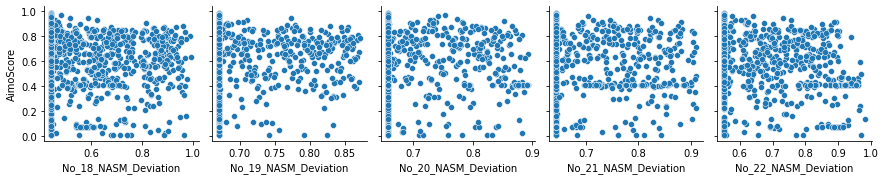

In [13]:
sns.pairplot(data=df,
                  y_vars=['AimoScore'],
                  x_vars=x6)

plt.show()

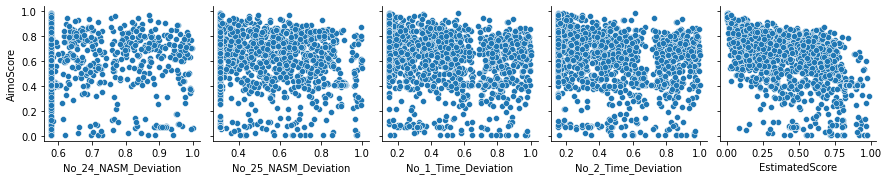

In [14]:
sns.pairplot(data=df,
                  y_vars=['AimoScore'],
                  x_vars=x7)

plt.show()

#### check symmetry and correlation between features as mentioned in slides

In [15]:
combined_dfs = pd.concat([df['No_4_Angle_Deviation'], df['No_6_Angle_Deviation']])
symmetric_difference = combined_dfs.drop_duplicates(keep=False)
print(len(symmetric_difference),df['No_4_Angle_Deviation'].corr(df['No_6_Angle_Deviation']))

combined_dfs = pd.concat([df['No_5_Angle_Deviation'], df['No_7_Angle_Deviation']])
symmetric_difference = combined_dfs.drop_duplicates(keep=False)
print(len(symmetric_difference), df['No_5_Angle_Deviation'].corr(df['No_7_Angle_Deviation']))

combined_dfs = pd.concat([df['No_8_Angle_Deviation'], df['No_11_Angle_Deviation']])
symmetric_difference = combined_dfs.drop_duplicates(keep=False)
print(len(symmetric_difference),df['No_8_Angle_Deviation'].corr(df['No_11_Angle_Deviation']))

combined_dfs = pd.concat([df['No_9_Angle_Deviation'], df['No_12_Angle_Deviation']])
symmetric_difference = combined_dfs.drop_duplicates(keep=False)
print(len(symmetric_difference),df['No_9_Angle_Deviation'].corr(df['No_12_Angle_Deviation']))

combined_dfs = pd.concat([df['No_10_Angle_Deviation'], df['No_13_Angle_Deviation']])
symmetric_difference = combined_dfs.drop_duplicates(keep=False)
print(len(symmetric_difference),df['No_10_Angle_Deviation'].corr(df['No_13_Angle_Deviation']))

combined_dfs = pd.concat([df['No_1_NASM_Deviation'], df['No_2_NASM_Deviation']])
symmetric_difference = combined_dfs.drop_duplicates(keep=False)
print(len(symmetric_difference),df['No_1_NASM_Deviation'].corr(df['No_2_NASM_Deviation']))

combined_dfs = pd.concat([df['No_4_NASM_Deviation'], df['No_5_NASM_Deviation']])
symmetric_difference = combined_dfs.drop_duplicates(keep=False)
print(len(symmetric_difference),df['No_4_NASM_Deviation'].corr(df['No_5_NASM_Deviation']))

combined_dfs = pd.concat([df['No_8_NASM_Deviation'], df['No_9_NASM_Deviation']])
symmetric_difference = combined_dfs.drop_duplicates(keep=False)
print(len(symmetric_difference),df['No_8_NASM_Deviation'].corr(df['No_9_NASM_Deviation']))

combined_dfs = pd.concat([df['No_11_NASM_Deviation'], df['No_12_NASM_Deviation']])
symmetric_difference = combined_dfs.drop_duplicates(keep=False)
print(len(symmetric_difference),df['No_11_NASM_Deviation'].corr(df['No_12_NASM_Deviation']))

combined_dfs = pd.concat([df['No_13_NASM_Deviation'], df['No_14_NASM_Deviation']])
symmetric_difference = combined_dfs.drop_duplicates(keep=False)
print(len(symmetric_difference),df['No_13_NASM_Deviation'].corr(df['No_14_NASM_Deviation']))

combined_dfs = pd.concat([df['No_15_NASM_Deviation'], df['No_16_NASM_Deviation']])
symmetric_difference = combined_dfs.drop_duplicates(keep=False)
print(len(symmetric_difference),df['No_15_NASM_Deviation'].corr(df['No_16_NASM_Deviation']))

combined_dfs = pd.concat([df['No_18_NASM_Deviation'], df['No_19_NASM_Deviation']])
symmetric_difference = combined_dfs.drop_duplicates(keep=False)
print(len(symmetric_difference),df['No_18_NASM_Deviation'].corr(df['No_19_NASM_Deviation']))

826 0.31778521217608985
778 0.8722495019934463
501 0.3247487318593717
894 0.30147056462466143
810 0.9038269395840182
778 0.8722495019934463
810 0.9038269395840182
755 0.8802498984070446
718 0.8664566741701001
1098 0.1703532000677095
775 0.04650467191380994
602 0.16439965177807364


#### prepare dataset

    drop EstimatedScore
    make variables for
        x_ad_all => All Angle_Deviation (13)
        x_ad => Angle_Deviation - symmetry (8)
        x_nd_all => All NASM_Deviation (25)
        x_nd => NASM_Deviation - symmetry (18)
        x_td => Time_Deviation (2)
        
        x_ad_nd_all => All Angle_Deviation and NASM_Deviation (38)
        x_ad_nd => Angle_Deviation and NASM_Deviation - symmetry (26)
        x_ad_nd_td => Angle_Deviation, NASM_Deviation - symmetry And Time deviation (28)
        x => All 40 features (40)
        y => AimoScore

In [16]:
df.drop('EstimatedScore', axis=1, inplace=True)

#x_ad_all = df[['No_1_Angle_Deviation','No_2_Angle_Deviation','No_3_Angle_Deviation','No_4_Angle_Deviation','No_5_Angle_Deviation','No_6_Angle_Deviation','No_7_Angle_Deviation','No_8_Angle_Deviation','No_9_Angle_Deviation','No_10_Angle_Deviation','No_11_Angle_Deviation','No_12_Angle_Deviation','No_13_Angle_Deviation']]
#x_ad = df[['No_1_Angle_Deviation','No_2_Angle_Deviation','No_3_Angle_Deviation','No_4_Angle_Deviation','No_5_Angle_Deviation','No_8_Angle_Deviation','No_9_Angle_Deviation','No_10_Angle_Deviation']]
#x_nd_all = df[['No_1_NASM_Deviation','No_2_NASM_Deviation','No_3_NASM_Deviation','No_4_NASM_Deviation','No_5_NASM_Deviation','No_6_NASM_Deviation','No_7_NASM_Deviation','No_8_NASM_Deviation','No_9_NASM_Deviation','No_10_NASM_Deviation','No_11_NASM_Deviation','No_12_NASM_Deviation','No_13_NASM_Deviation','No_14_NASM_Deviation','No_15_NASM_Deviation','No_16_NASM_Deviation','No_17_NASM_Deviation','No_18_NASM_Deviation','No_19_NASM_Deviation','No_20_NASM_Deviation','No_21_NASM_Deviation','No_22_NASM_Deviation','No_23_NASM_Deviation','No_24_NASM_Deviation','No_25_NASM_Deviation']]
#x_nd = df[['No_1_NASM_Deviation','No_3_NASM_Deviation','No_4_NASM_Deviation','No_6_NASM_Deviation','No_7_NASM_Deviation','No_8_NASM_Deviation','No_10_NASM_Deviation','No_11_NASM_Deviation','No_13_NASM_Deviation','No_15_NASM_Deviation','No_17_NASM_Deviation','No_18_NASM_Deviation','No_20_NASM_Deviation','No_21_NASM_Deviation','No_22_NASM_Deviation','No_23_NASM_Deviation','No_24_NASM_Deviation','No_25_NASM_Deviation']]
#x_td = df[['No_1_Time_Deviation','No_2_Time_Deviation']]

#38
x_ad_nd_all = df.loc[:, 'No_1_Angle_Deviation':'No_25_NASM_Deviation']
#26
x_ad_nd = df[['No_1_Angle_Deviation','No_2_Angle_Deviation','No_3_Angle_Deviation','No_4_Angle_Deviation','No_5_Angle_Deviation','No_8_Angle_Deviation','No_9_Angle_Deviation','No_10_Angle_Deviation','No_1_NASM_Deviation','No_3_NASM_Deviation','No_4_NASM_Deviation','No_6_NASM_Deviation','No_7_NASM_Deviation','No_8_NASM_Deviation','No_10_NASM_Deviation','No_11_NASM_Deviation','No_13_NASM_Deviation','No_15_NASM_Deviation','No_17_NASM_Deviation','No_18_NASM_Deviation','No_20_NASM_Deviation','No_21_NASM_Deviation','No_22_NASM_Deviation','No_23_NASM_Deviation','No_24_NASM_Deviation','No_25_NASM_Deviation']]
#28
x_ad_nd_td = df[['No_1_Angle_Deviation','No_2_Angle_Deviation','No_3_Angle_Deviation','No_4_Angle_Deviation','No_5_Angle_Deviation','No_8_Angle_Deviation','No_9_Angle_Deviation','No_10_Angle_Deviation','No_1_NASM_Deviation','No_3_NASM_Deviation','No_4_NASM_Deviation','No_6_NASM_Deviation','No_7_NASM_Deviation','No_8_NASM_Deviation','No_10_NASM_Deviation','No_11_NASM_Deviation','No_13_NASM_Deviation','No_15_NASM_Deviation','No_17_NASM_Deviation','No_18_NASM_Deviation','No_20_NASM_Deviation','No_21_NASM_Deviation','No_22_NASM_Deviation','No_23_NASM_Deviation','No_24_NASM_Deviation','No_25_NASM_Deviation','No_1_Time_Deviation','No_2_Time_Deviation']]
#40
x = df.loc[:, 'No_1_Angle_Deviation':'No_2_Time_Deviation']

y = df['AimoScore']

# Section 1
Models

1. All 40 features
2. Angle deviation - symmetry, NASM deviation - symmetry, Time deviation (28)
3. All Angle & NASM deviation - symmetry (26)
4. All Angle deviation & NASM deviation (38)

In [17]:
x_temp = sm.add_constant(x)
mlrm_1 = sm.OLS(y, x_temp).fit()
#mlrm_1.summary()

In [18]:
x_temp = sm.add_constant(x_ad_nd_td)
mlrm_2 = sm.OLS(y, x_temp).fit()
#mlrm_2.summary()

In [19]:
x_temp = sm.add_constant(x_ad_nd)
mlrm_3 = sm.OLS(y, x_temp).fit()
#mlrm_3.summary()

In [20]:
x_temp = sm.add_constant(x_ad_nd_all)
mlrm_4 = sm.OLS(y, x_temp).fit()
#mlrm_4.summary()

### Result of Simple Models

In [21]:
print("40 Features Angle + Nasm + Time:",mlrm_1.rsquared_adj,mlrm_1.pvalues.loc['const'])
print("28 Features Angle + NASM - symmetry + Time:",mlrm_2.rsquared_adj,mlrm_2.pvalues.loc['const'])
print("26 Features Angle + NASM - symmetry - Time:",mlrm_3.rsquared_adj,mlrm_3.pvalues.loc['const'])
print("38 Fetures Angle + NASM :",mlrm_4.rsquared_adj,mlrm_4.pvalues.loc['const'])

40 Features Angle + Nasm + Time: 0.5567941623669705 1.885532912739247e-37
28 Features Angle + NASM - symmetry + Time: 0.4966120562977935 3.899471602199339e-54
26 Features Angle + NASM - symmetry - Time: 0.48986409891410665 2.771283295022529e-54
38 Fetures Angle + NASM : 0.5502681619638893 2.0875485505438746e-39


## Finding Setion 1

all 40 features is good candidate for Model

# Section 2

    find all interaction term where pvalue < 0.05 in each 4 sets
    make model for each 4 sets

In [22]:
#40 Features Angle + Nasm + Time

df_modify_40 = x.copy()
df_temp = x.copy()

for i in df_temp[1:]:
    for j in df_temp[1:]:
        df_temp['rand'] = df_temp[i] * df_temp[j]
        x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
        x_temp = sm.add_constant(x_temp)
        mlrm_rand = sm.OLS(y, x_temp).fit()
        
        if mlrm_rand.pvalues.loc['rand'] < 0.05:
            if i == "rand":
                pass
            elif j == "rand":
                pass
            else:
                print(i,j,mlrm_rand.pvalues.loc['rand'],mlrm_rand.rsquared_adj)
                df_modify_40[i+j] = df_temp[i] * df_temp[j]
                print("--------")

No_1_Angle_Deviation No_2_Angle_Deviation 0.02678624308249981 0.5580990306255529
--------
No_1_Angle_Deviation No_3_Angle_Deviation 0.034387481073169204 0.5579558101028033
--------
No_1_Angle_Deviation No_6_Angle_Deviation 0.010488158747090436 0.5586476901519548
--------
No_1_Angle_Deviation No_8_Angle_Deviation 0.0003288566316233059 0.5607580507163161
--------
No_1_Angle_Deviation No_10_Angle_Deviation 0.009798611207429853 0.5586880425550562
--------
No_1_Angle_Deviation No_12_Angle_Deviation 0.02405501881655412 0.5581611242276915
--------
No_1_Angle_Deviation No_13_Angle_Deviation 0.0029345215791814604 0.5594126684074242
--------
No_1_Angle_Deviation No_4_NASM_Deviation 0.009798611207429853 0.5586880425550562
--------
No_1_Angle_Deviation No_5_NASM_Deviation 0.0029345215791814604 0.5594126684074242
--------
No_1_Angle_Deviation No_6_NASM_Deviation 0.003963417583325828 0.5592305947459622
--------
No_1_Angle_Deviation No_7_NASM_Deviation 0.010175460406783023 0.5586656419713487
--------

No_6_Angle_Deviation No_9_NASM_Deviation 0.003441827555956435 0.5593159686962399
--------
No_6_Angle_Deviation No_11_NASM_Deviation 0.029591278754968985 0.5580417565475579
--------
No_6_Angle_Deviation No_12_NASM_Deviation 0.005385389548448367 0.5590457804179819
--------
No_6_Angle_Deviation No_22_NASM_Deviation 0.0007587993974867785 0.560240724677076
--------
No_7_Angle_Deviation No_3_Angle_Deviation 0.0034720951546583 0.559310665736972
--------
No_7_Angle_Deviation No_5_Angle_Deviation 0.0001853512252208905 0.5611146097558634
--------
No_7_Angle_Deviation No_7_Angle_Deviation 0.002618546633877581 0.5594818920790896
--------
No_7_Angle_Deviation No_1_NASM_Deviation 0.0001853512252208905 0.5611146097558634
--------
No_7_Angle_Deviation No_2_NASM_Deviation 0.002618546633877581 0.5594818920790896
--------
No_7_Angle_Deviation No_6_NASM_Deviation 1.1753987388361194e-05 0.5628437928956654
--------
No_7_Angle_Deviation No_17_NASM_Deviation 0.0016093845552204254 0.5597788377573947
--------
N

No_12_Angle_Deviation No_16_NASM_Deviation 0.03576248871334394 0.5579334688091429
--------
No_12_Angle_Deviation No_17_NASM_Deviation 0.045560560355882296 0.5577963965272545
--------
No_12_Angle_Deviation No_22_NASM_Deviation 0.005667419941978805 0.5590151063290993
--------
No_12_Angle_Deviation No_24_NASM_Deviation 8.8686608939024e-08 0.5659364998400158
--------
No_12_Angle_Deviation No_25_NASM_Deviation 0.017058563889494133 0.5583611247485225
--------
No_13_Angle_Deviation No_1_Angle_Deviation 0.0029345215791814604 0.5594126684074242
--------
No_13_Angle_Deviation No_2_Angle_Deviation 0.012056202866700729 0.5585652239173753
--------
No_13_Angle_Deviation No_4_Angle_Deviation 4.7825848924140494e-05 0.5619615234576005
--------
No_13_Angle_Deviation No_8_Angle_Deviation 0.02544102498606344 0.5581287490710729
--------
No_13_Angle_Deviation No_9_Angle_Deviation 1.8545525198063478e-05 0.5625566511030795
--------
No_13_Angle_Deviation No_10_Angle_Deviation 6.166084926828792e-09 0.5676291682

No_5_NASM_Deviation No_8_Angle_Deviation 0.02544102498606344 0.5581287490710729
--------
No_5_NASM_Deviation No_9_Angle_Deviation 1.8545525198063478e-05 0.5625566511030795
--------
No_5_NASM_Deviation No_10_Angle_Deviation 6.166084926828792e-09 0.5676291682916133
--------
No_5_NASM_Deviation No_11_Angle_Deviation 1.8696675572230412e-06 0.5640045996593686
--------
No_5_NASM_Deviation No_12_Angle_Deviation 0.0003756536632193654 0.5606755089754565
--------
No_5_NASM_Deviation No_13_Angle_Deviation 3.3454093373771307e-13 0.5738556669341556
--------
No_5_NASM_Deviation No_3_NASM_Deviation 0.0029345215791814604 0.5594126684074242
--------
No_5_NASM_Deviation No_4_NASM_Deviation 6.166084926828792e-09 0.5676291682916133
--------
No_5_NASM_Deviation No_5_NASM_Deviation 3.3454093373771307e-13 0.5738556669341556
--------
No_5_NASM_Deviation No_6_NASM_Deviation 1.549575794673008e-09 0.5685062097738351
--------
No_5_NASM_Deviation No_7_NASM_Deviation 1.816123781303977e-08 0.5669431949259738
-------

No_10_NASM_Deviation No_9_Angle_Deviation 0.00022579825068167505 0.5609917135070004
--------
No_10_NASM_Deviation No_10_Angle_Deviation 2.9115358024741867e-07 0.5651824448344137
--------
No_10_NASM_Deviation No_11_Angle_Deviation 0.010215418096220225 0.5586633167847301
--------
No_10_NASM_Deviation No_13_Angle_Deviation 1.5370017085971193e-07 0.5655876035499434
--------
No_10_NASM_Deviation No_4_NASM_Deviation 2.9115358024741867e-07 0.5651824448344137
--------
No_10_NASM_Deviation No_5_NASM_Deviation 1.5370017085971193e-07 0.5655876035499434
--------
No_10_NASM_Deviation No_6_NASM_Deviation 0.0012476530600187598 0.5599348329084657
--------
No_10_NASM_Deviation No_9_NASM_Deviation 0.04916629166047495 0.5577536259083938
--------
No_10_NASM_Deviation No_10_NASM_Deviation 0.0005423432905472595 0.5604481010064702
--------
No_10_NASM_Deviation No_11_NASM_Deviation 0.00013541191952544244 0.5613103569772084
--------
No_10_NASM_Deviation No_12_NASM_Deviation 2.967273395828531e-06 0.563712549349

No_16_NASM_Deviation No_10_Angle_Deviation 1.0853949959743675e-05 0.5628939909288639
--------
No_16_NASM_Deviation No_11_Angle_Deviation 0.02759397946106458 0.5580819217158333
--------
No_16_NASM_Deviation No_12_Angle_Deviation 0.03576248871334394 0.5579334688091429
--------
No_16_NASM_Deviation No_13_Angle_Deviation 7.981571419561399e-10 0.5689274536893265
--------
No_16_NASM_Deviation No_1_NASM_Deviation 0.015778054018011734 0.5584068377545541
--------
No_16_NASM_Deviation No_4_NASM_Deviation 1.0853949959743675e-05 0.5628939909288639
--------
No_16_NASM_Deviation No_5_NASM_Deviation 7.981571419561399e-10 0.5689274536893265
--------
No_16_NASM_Deviation No_6_NASM_Deviation 0.0009288434388918904 0.5601161655056579
--------
No_16_NASM_Deviation No_8_NASM_Deviation 0.0219169635939167 0.558215063548382
--------
No_16_NASM_Deviation No_9_NASM_Deviation 9.477252760779938e-05 0.5615332607671095
--------
No_16_NASM_Deviation No_10_NASM_Deviation 0.0017085825715828671 0.5597422538208419
------

No_22_NASM_Deviation No_24_NASM_Deviation 1.9843227153128382e-16 0.578534892382044
--------
No_22_NASM_Deviation No_25_NASM_Deviation 3.951850336217241e-12 0.5722936863263479
--------
No_22_NASM_Deviation No_1_Time_Deviation 0.0016646042608542027 0.5597582003824021
--------
No_22_NASM_Deviation No_2_Time_Deviation 0.00039565845424504524 0.5606433416380076
--------
No_23_NASM_Deviation No_3_Angle_Deviation 0.005600929642024668 0.559022195584522
--------
No_23_NASM_Deviation No_7_Angle_Deviation 0.03983731430673969 0.5578721879496178
--------
No_23_NASM_Deviation No_11_Angle_Deviation 0.00017351300063719294 0.5611557341691751
--------
No_23_NASM_Deviation No_2_NASM_Deviation 0.03983731430673969 0.5578721879496178
--------
No_23_NASM_Deviation No_6_NASM_Deviation 0.033933414647636696 0.5579633932965975
--------
No_23_NASM_Deviation No_7_NASM_Deviation 0.03145527130159516 0.5580067392194894
--------
No_23_NASM_Deviation No_9_NASM_Deviation 0.04554663984904114 0.5577965684756321
--------
No

In [23]:
#28 Features Angle + NASM - symmetry + Time

df_modify_28 = x_ad_nd_td.copy()
df_temp = x_ad_nd_td.copy()

for i in df_temp[1:]:
    for j in df_temp[1:]:
        df_temp['rand'] = df_temp[i] * df_temp[j]
        x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
        x_temp = sm.add_constant(x_temp)
        mlrm_rand = sm.OLS(y, x_temp).fit()
        
        if mlrm_rand.pvalues.loc['rand'] < 0.05:
            if i == "rand":
                pass
            elif j == "rand":
                pass
            else:
                print(i,j,mlrm_rand.pvalues.loc['rand'],mlrm_rand.rsquared_adj)
                df_modify_28[i+j] = df_temp[i] * df_temp[j]
                print("--------")

No_1_Angle_Deviation No_1_Angle_Deviation 0.015548408489458057 0.4984397070200126
--------
No_1_Angle_Deviation No_2_Angle_Deviation 0.00298007650514782 0.4995533595024946
--------
No_1_Angle_Deviation No_3_Angle_Deviation 0.0006894449539132128 0.5005640534805542
--------
No_1_Angle_Deviation No_4_Angle_Deviation 0.043187526481164216 0.497775835972452
--------
No_1_Angle_Deviation No_5_Angle_Deviation 0.029818051935725065 0.49801351471864375
--------
No_1_Angle_Deviation No_8_Angle_Deviation 0.0005607377651254688 0.500707935220686
--------
No_1_Angle_Deviation No_10_Angle_Deviation 0.0016482634655009634 0.49996023296203995
--------
No_1_Angle_Deviation No_1_NASM_Deviation 0.029818051935725065 0.49801351471864375
--------
No_1_Angle_Deviation No_3_NASM_Deviation 0.015548408489458057 0.4984397070200126
--------
No_1_Angle_Deviation No_4_NASM_Deviation 0.0016482634655009634 0.49996023296203995
--------
No_1_Angle_Deviation No_6_NASM_Deviation 0.0006739425274203087 0.5005798766092202
-----

No_9_Angle_Deviation No_7_NASM_Deviation 0.003748999224860844 0.4993965557922402
--------
No_9_Angle_Deviation No_10_NASM_Deviation 0.0008440337123902939 0.5004234375133931
--------
No_9_Angle_Deviation No_15_NASM_Deviation 0.032338968391128924 0.4979611073160821
--------
No_9_Angle_Deviation No_17_NASM_Deviation 0.0043564719790639625 0.4992942724262146
--------
No_9_Angle_Deviation No_20_NASM_Deviation 0.005622388625950612 0.4991211228239042
--------
No_9_Angle_Deviation No_22_NASM_Deviation 6.493333287665999e-10 0.5104387727575523
--------
No_9_Angle_Deviation No_25_NASM_Deviation 0.014238955174986847 0.4984979718958823
--------
No_10_Angle_Deviation No_1_Angle_Deviation 0.0016482634655009634 0.49996023296203995
--------
No_10_Angle_Deviation No_2_Angle_Deviation 0.00012345823662191765 0.5017682906984747
--------
No_10_Angle_Deviation No_4_Angle_Deviation 3.6527364566892e-05 0.5026279964895548
--------
No_10_Angle_Deviation No_5_Angle_Deviation 0.004836052657499483 0.4992232909661626

No_6_NASM_Deviation No_2_Time_Deviation 0.03924028868263995 0.497836945113046
--------
No_7_NASM_Deviation No_1_Angle_Deviation 0.013954206381310291 0.49851137054792327
--------
No_7_NASM_Deviation No_2_Angle_Deviation 0.04493974718872052 0.4977505651596439
--------
No_7_NASM_Deviation No_5_Angle_Deviation 0.0001943551194597338 0.5014492650614537
--------
No_7_NASM_Deviation No_9_Angle_Deviation 0.003748999224860844 0.4993965557922402
--------
No_7_NASM_Deviation No_10_Angle_Deviation 1.5051117546390624e-08 0.508188295426633
--------
No_7_NASM_Deviation No_1_NASM_Deviation 0.0001943551194597338 0.5014492650614537
--------
No_7_NASM_Deviation No_3_NASM_Deviation 0.013954206381310291 0.49851137054792327
--------
No_7_NASM_Deviation No_4_NASM_Deviation 1.5051117546390624e-08 0.508188295426633
--------
No_7_NASM_Deviation No_6_NASM_Deviation 0.00391834067622368 0.4993664394524574
--------
No_7_NASM_Deviation No_11_NASM_Deviation 9.873852400897654e-27 0.5376728924303361
--------
No_7_NASM_D

No_18_NASM_Deviation No_18_NASM_Deviation 0.006438013702765711 0.499029500765406
--------
No_20_NASM_Deviation No_4_Angle_Deviation 0.018730742641579798 0.49831688279534725
--------
No_20_NASM_Deviation No_8_Angle_Deviation 0.029496840346318894 0.4980205218490068
--------
No_20_NASM_Deviation No_9_Angle_Deviation 0.005622388625950612 0.4991211228239042
--------
No_20_NASM_Deviation No_10_Angle_Deviation 0.0403018710631133 0.49781989726850806
--------
No_20_NASM_Deviation No_4_NASM_Deviation 0.0403018710631133 0.49781989726850806
--------
No_20_NASM_Deviation No_7_NASM_Deviation 0.022956076519426313 0.4981835384553308
--------
No_20_NASM_Deviation No_15_NASM_Deviation 0.006030013466353362 0.49907375315553926
--------
No_20_NASM_Deviation No_24_NASM_Deviation 0.04017267890607479 0.49782194663625146
--------
No_21_NASM_Deviation No_1_Time_Deviation 0.013546848260124108 0.498531035105818
--------
No_21_NASM_Deviation No_2_Time_Deviation 0.012042721867094087 0.4986093066078253
--------
No_2

In [24]:
#26 Features Angle + NASM - symmetry - Time

df_modify_26 = x_ad_nd.copy()
df_temp = x_ad_nd.copy()

for i in df_temp[1:]:
    for j in df_temp[1:]:
        df_temp['rand'] = df_temp[i] * df_temp[j]
        x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
        x_temp = sm.add_constant(x_temp)
        mlrm_rand = sm.OLS(y, x_temp).fit()
        
        if mlrm_rand.pvalues.loc['rand'] < 0.05:
            if i == "rand":
                pass
            elif j == "rand":
                pass
            else:
                print(i,j,mlrm_rand.pvalues.loc['rand'],mlrm_rand.rsquared_adj)
                df_modify_26[i+j] = df_temp[i] * df_temp[j]
                print("--------")

No_1_Angle_Deviation No_1_Angle_Deviation 0.014229990888535783 0.49177286285943245
--------
No_1_Angle_Deviation No_2_Angle_Deviation 0.0008429926488162252 0.4937216807769619
--------
No_1_Angle_Deviation No_3_Angle_Deviation 0.0004892073053409889 0.4941049882173366
--------
No_1_Angle_Deviation No_5_Angle_Deviation 0.016887947878627643 0.49165823628049177
--------
No_1_Angle_Deviation No_8_Angle_Deviation 0.0004310407602323377 0.49419439849974023
--------
No_1_Angle_Deviation No_10_Angle_Deviation 0.0017341570795976935 0.4932166608801747
--------
No_1_Angle_Deviation No_1_NASM_Deviation 0.016887947878627643 0.49165823628049177
--------
No_1_Angle_Deviation No_3_NASM_Deviation 0.014229990888535783 0.49177286285943245
--------
No_1_Angle_Deviation No_4_NASM_Deviation 0.0017341570795976935 0.4932166608801747
--------
No_1_Angle_Deviation No_6_NASM_Deviation 0.0009015027109925903 0.4936745413955518
--------
No_1_Angle_Deviation No_7_NASM_Deviation 0.026772524818780785 0.49135288846489367


--------
No_10_Angle_Deviation No_2_Angle_Deviation 9.402417421314213e-05 0.49527580092179235
--------
No_10_Angle_Deviation No_4_Angle_Deviation 0.00011608977416515145 0.4951255139395173
--------
No_10_Angle_Deviation No_5_Angle_Deviation 0.005027681017527323 0.4924796943811006
--------
No_10_Angle_Deviation No_9_Angle_Deviation 0.010001170547856174 0.4920105896435828
--------
No_10_Angle_Deviation No_10_Angle_Deviation 0.0006665891703894744 0.49388683945258316
--------
No_10_Angle_Deviation No_1_NASM_Deviation 0.005027681017527323 0.4924796943811006
--------
No_10_Angle_Deviation No_3_NASM_Deviation 0.0017341570795976935 0.4932166608801747
--------
No_10_Angle_Deviation No_4_NASM_Deviation 0.0006665891703894744 0.49388683945258316
--------
No_10_Angle_Deviation No_6_NASM_Deviation 8.741287241622958e-09 0.5019718636868518
--------
No_10_Angle_Deviation No_7_NASM_Deviation 5.488591362483428e-08 0.5006409965528222
--------
No_10_Angle_Deviation No_10_NASM_Deviation 1.583631282070779e-06

No_7_NASM_Deviation No_15_NASM_Deviation 0.04805096645928843 0.4909732240633723
--------
No_7_NASM_Deviation No_17_NASM_Deviation 0.00029554497490075226 0.49446145255064944
--------
No_7_NASM_Deviation No_20_NASM_Deviation 0.01420267470946655 0.4917741521880322
--------
No_7_NASM_Deviation No_24_NASM_Deviation 1.602173403508657e-11 0.5065350996320436
--------
No_8_NASM_Deviation No_4_Angle_Deviation 0.04889407720238438 0.49096209642902855
--------
No_8_NASM_Deviation No_5_Angle_Deviation 0.0003983360088890468 0.4942501765866293
--------
No_8_NASM_Deviation No_9_Angle_Deviation 0.04727911118605685 0.49098359318882656
--------
No_8_NASM_Deviation No_1_NASM_Deviation 0.0003983360088890468 0.4942501765866293
--------
No_8_NASM_Deviation No_6_NASM_Deviation 0.010728276991177307 0.49196311127185244
--------
No_8_NASM_Deviation No_8_NASM_Deviation 0.0039425837136136555 0.49264698583086675
--------
No_8_NASM_Deviation No_11_NASM_Deviation 8.933005024711948e-08 0.5002883068912642
--------
No_8_

No_20_NASM_Deviation No_15_NASM_Deviation 0.002321101601485419 0.4930137290871731
--------
No_20_NASM_Deviation No_24_NASM_Deviation 0.028124996020548722 0.4913205258756591
--------
No_21_NASM_Deviation No_8_NASM_Deviation 0.02642586734387307 0.4913614570646746
--------
No_22_NASM_Deviation No_1_Angle_Deviation 1.9772205470188064e-10 0.5047166477130525
--------
No_22_NASM_Deviation No_2_Angle_Deviation 0.0200777651576995 0.49154302913318904
--------
No_22_NASM_Deviation No_3_Angle_Deviation 1.345684957903821e-09 0.5033275904559652
--------
No_22_NASM_Deviation No_4_Angle_Deviation 9.834463696273007e-08 0.5002187042669044
--------
No_22_NASM_Deviation No_5_Angle_Deviation 0.012990413585374047 0.4918340937801138
--------
No_22_NASM_Deviation No_8_Angle_Deviation 3.901389355875123e-07 0.4992215914213096
--------
No_22_NASM_Deviation No_9_Angle_Deviation 1.5441887258850051e-09 0.5032279044831658
--------
No_22_NASM_Deviation No_10_Angle_Deviation 3.2107091618844274e-09 0.5026975548621293
-

In [25]:
#38 Fetures Angle + NASM

df_modify_38 = x_ad_nd_all.copy()
df_temp = x_ad_nd_all.copy()

for i in df_temp[1:]:
    for j in df_temp[1:]:
        df_temp['rand'] = df_temp[i] * df_temp[j]
        x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
        x_temp = sm.add_constant(x_temp)
        mlrm_rand = sm.OLS(y, x_temp).fit()
        
        if mlrm_rand.pvalues.loc['rand'] < 0.05:
            if i == "rand":
                pass
            elif j == "rand":
                pass
            else:
                print(i,j,mlrm_rand.pvalues.loc['rand'],mlrm_rand.rsquared_adj)
                df_modify_38[i+j] = df_temp[i] * df_temp[j]
                print("--------")

No_1_Angle_Deviation No_1_Angle_Deviation 0.0437408040261577 0.5513068842577762
--------
No_1_Angle_Deviation No_2_Angle_Deviation 0.008557013792972485 0.5522686848310737
--------
No_1_Angle_Deviation No_3_Angle_Deviation 0.02887386122085506 0.5515464994899999
--------
No_1_Angle_Deviation No_6_Angle_Deviation 0.013633713928244976 0.5519891039200417
--------
No_1_Angle_Deviation No_8_Angle_Deviation 0.00032682191119641355 0.5542882823331603
--------
No_1_Angle_Deviation No_10_Angle_Deviation 0.008544819311635041 0.5522695455432647
--------
No_1_Angle_Deviation No_12_Angle_Deviation 0.015368648331535242 0.5519177487924524
--------
No_1_Angle_Deviation No_13_Angle_Deviation 0.0032765269083538853 0.5528534699684167
--------
No_1_Angle_Deviation No_3_NASM_Deviation 0.0437408040261577 0.5513068842577762
--------
No_1_Angle_Deviation No_4_NASM_Deviation 0.008544819311635041 0.5522695455432647
--------
No_1_Angle_Deviation No_5_NASM_Deviation 0.0032765269083538853 0.5528534699684167
--------


No_6_Angle_Deviation No_22_NASM_Deviation 0.0011028648539531923 0.5535270263265909
--------
No_7_Angle_Deviation No_3_Angle_Deviation 0.010813605304882163 0.5521278020691894
--------
No_7_Angle_Deviation No_5_Angle_Deviation 9.927189324448775e-05 0.5550404501893413
--------
No_7_Angle_Deviation No_7_Angle_Deviation 0.002552368367220287 0.5530071418182114
--------
No_7_Angle_Deviation No_1_NASM_Deviation 9.927189324448775e-05 0.5550404501893413
--------
No_7_Angle_Deviation No_2_NASM_Deviation 0.002552368367220287 0.5530071418182114
--------
No_7_Angle_Deviation No_6_NASM_Deviation 3.06798948437135e-06 0.5572565418036476
--------
No_7_Angle_Deviation No_17_NASM_Deviation 0.0010684107123561152 0.5535467867472585
--------
No_7_Angle_Deviation No_21_NASM_Deviation 0.002891023116800793 0.5529304172672134
--------
No_7_Angle_Deviation No_23_NASM_Deviation 0.02769695600569186 0.5515707432691269
--------
No_7_Angle_Deviation No_25_NASM_Deviation 0.007250094477218456 0.5523688908211545
--------

No_12_Angle_Deviation No_11_NASM_Deviation 8.4467225433997e-07 0.5580833878984506
--------
No_12_Angle_Deviation No_12_NASM_Deviation 6.081901818165896e-10 0.5627366580155064
--------
No_12_Angle_Deviation No_16_NASM_Deviation 0.00820868638913314 0.5522937780538372
--------
No_12_Angle_Deviation No_17_NASM_Deviation 0.03729123235922846 0.551398379968044
--------
No_12_Angle_Deviation No_22_NASM_Deviation 0.0014561919569554722 0.5533542801826672
--------
No_12_Angle_Deviation No_24_NASM_Deviation 1.3365033003121793e-08 0.5607485816258038
--------
No_12_Angle_Deviation No_25_NASM_Deviation 0.04018453814020559 0.5513554334017385
--------
No_13_Angle_Deviation No_1_Angle_Deviation 0.0032765269083538853 0.5528534699684167
--------
No_13_Angle_Deviation No_2_Angle_Deviation 0.010464681523968932 0.5521474980699113
--------
No_13_Angle_Deviation No_4_Angle_Deviation 0.00013787591964456656 0.5548325789295427
--------
No_13_Angle_Deviation No_8_Angle_Deviation 0.012577565903860886 0.552037267580

No_4_NASM_Deviation No_16_NASM_Deviation 8.316322731583102e-06 0.5566186430118438
--------
No_4_NASM_Deviation No_17_NASM_Deviation 1.9019796882007732e-07 0.5590408281615425
--------
No_4_NASM_Deviation No_19_NASM_Deviation 0.007835376969719907 0.5523219083680713
--------
No_4_NASM_Deviation No_20_NASM_Deviation 0.011057589480038177 0.5521144126905144
--------
No_4_NASM_Deviation No_22_NASM_Deviation 0.000733568955992235 0.5537813494043405
--------
No_4_NASM_Deviation No_24_NASM_Deviation 0.00010192637233751209 0.5550237387264768
--------
No_5_NASM_Deviation No_1_Angle_Deviation 0.0032765269083538853 0.5528534699684167
--------
No_5_NASM_Deviation No_2_Angle_Deviation 0.010464681523968932 0.5521474980699113
--------
No_5_NASM_Deviation No_4_Angle_Deviation 0.00013787591964456656 0.5548325789295427
--------
No_5_NASM_Deviation No_8_Angle_Deviation 0.012577565903860886 0.5520372675809803
--------
No_5_NASM_Deviation No_9_Angle_Deviation 9.145473802890839e-06 0.5565579239210829
--------
N

No_9_NASM_Deviation No_4_Angle_Deviation 0.0021948245290575796 0.5531002557865583
--------
No_9_NASM_Deviation No_5_Angle_Deviation 0.04920427064972713 0.5512398480382025
--------
No_9_NASM_Deviation No_6_Angle_Deviation 0.0034076756820025315 0.5528293735389781
--------
No_9_NASM_Deviation No_9_Angle_Deviation 2.3667960084488035e-05 0.5559513111647717
--------
No_9_NASM_Deviation No_10_Angle_Deviation 0.02802906557580617 0.551563795089339
--------
No_9_NASM_Deviation No_13_Angle_Deviation 0.01395751511810145 0.5519751027073023
--------
No_9_NASM_Deviation No_1_NASM_Deviation 0.04920427064972713 0.5512398480382025
--------
No_9_NASM_Deviation No_4_NASM_Deviation 0.02802906557580617 0.551563795089339
--------
No_9_NASM_Deviation No_5_NASM_Deviation 0.01395751511810145 0.5519751027073023
--------
No_9_NASM_Deviation No_8_NASM_Deviation 0.01317088105038564 0.5520097215354263
--------
No_9_NASM_Deviation No_10_NASM_Deviation 0.024527624568217506 0.5516417627722163
--------
No_9_NASM_Deviati

No_13_NASM_Deviation No_24_NASM_Deviation 0.03378750212902605 0.5514553142077285
--------
No_13_NASM_Deviation No_25_NASM_Deviation 0.004244032523881247 0.5526948862173531
--------
No_14_NASM_Deviation No_4_Angle_Deviation 0.024502565629666382 0.5516423615183883
--------
No_14_NASM_Deviation No_5_Angle_Deviation 0.023583617339489625 0.5516647681358171
--------
No_14_NASM_Deviation No_1_NASM_Deviation 0.023583617339489625 0.5516647681358171
--------
No_14_NASM_Deviation No_7_NASM_Deviation 0.005295494324197749 0.552559753149926
--------
No_14_NASM_Deviation No_11_NASM_Deviation 0.010189268122858579 0.5521635255073791
--------
No_14_NASM_Deviation No_12_NASM_Deviation 0.0009377186782993634 0.5536280867475977
--------
No_14_NASM_Deviation No_20_NASM_Deviation 0.02683297940555147 0.5515892322911904
--------
No_15_NASM_Deviation No_3_Angle_Deviation 0.021289096637018088 0.5517249161198396
--------
No_15_NASM_Deviation No_6_NASM_Deviation 0.007458073895135667 0.5523517660464055
--------
No_1

No_21_NASM_Deviation No_8_NASM_Deviation 0.012591304034843941 0.5520366147966496
--------
No_21_NASM_Deviation No_9_NASM_Deviation 0.016092088172749486 0.5518904123550299
--------
No_22_NASM_Deviation No_1_Angle_Deviation 8.812731184252474e-06 0.5565816004003898
--------
No_22_NASM_Deviation No_3_Angle_Deviation 4.767733272741266e-06 0.5569743646165718
--------
No_22_NASM_Deviation No_4_Angle_Deviation 0.0010499967520169234 0.5535576132870734
--------
No_22_NASM_Deviation No_6_Angle_Deviation 0.0011028648539531923 0.5535270263265909
--------
No_22_NASM_Deviation No_8_Angle_Deviation 0.0007301045274040903 0.5537843077626603
--------
No_22_NASM_Deviation No_9_Angle_Deviation 1.807068911620716e-08 0.5605545013557688
--------
No_22_NASM_Deviation No_10_Angle_Deviation 0.000733568955992235 0.5537813494043405
--------
No_22_NASM_Deviation No_12_Angle_Deviation 0.0014561919569554722 0.5533542801826672
--------
No_22_NASM_Deviation No_13_Angle_Deviation 0.0008400315623255846 0.553696713752162


In [26]:
print(len(df_modify_40.columns),df_modify_40.columns[-1])
print(len(df_modify_28.columns),df_modify_28.columns[-1])
print(len(df_modify_26.columns),df_modify_26.columns[-1])
print(len(df_modify_38.columns),df_modify_38.columns[-1])

693 No_2_Time_DeviationNo_24_NASM_Deviation
394 No_2_Time_DeviationNo_2_Time_Deviation
359 No_25_NASM_DeviationNo_24_NASM_Deviation
682 No_25_NASM_DeviationNo_24_NASM_Deviation


In [27]:
x_temp = df_modify_40.loc[:, 'No_1_Angle_Deviation':'No_2_Time_DeviationNo_24_NASM_Deviation']
x_temp = sm.add_constant(x_temp)
mlrm_5 = sm.OLS(y, x_temp).fit()
#mlrm_5.summary()

In [28]:
x_temp = df_modify_28.loc[:, 'No_1_Angle_Deviation':'No_2_Time_DeviationNo_2_Time_Deviation']
x_temp = sm.add_constant(x_temp)
mlrm_6 = sm.OLS(y, x_temp).fit()
#mlrm_6.summary()

In [29]:
x_temp = df_modify_26.loc[:, 'No_1_Angle_Deviation':'No_25_NASM_DeviationNo_24_NASM_Deviation']
x_temp = sm.add_constant(x_temp)
mlrm_7 = sm.OLS(y, x_temp).fit()
#mlrm_7.summary()

In [30]:
x_temp = df_modify_38.loc[:, 'No_1_Angle_Deviation':'No_25_NASM_DeviationNo_24_NASM_Deviation']
x_temp = sm.add_constant(x_temp)
mlrm_8 = sm.OLS(y, x_temp).fit()
#mlrm_8.summary()

### Result of Interaction Models

In [31]:
print("40 Features Angle + Nasm + Time:",mlrm_5.rsquared_adj,mlrm_5.pvalues.loc['const'])
print("28 Features Angle + NASM - symmetry + Time:",mlrm_6.rsquared_adj,mlrm_6.pvalues.loc['const'])
print("26 Features Angle + NASM - symmetry - Time:",mlrm_7.rsquared_adj,mlrm_7.pvalues.loc['const'])
print("38 Fetures Angle + NASM :",mlrm_8.rsquared_adj,mlrm_8.pvalues.loc['const'])

40 Features Angle + Nasm + Time: 0.7512267168121359 0.40043169880169616
28 Features Angle + NASM - symmetry + Time: 0.7069552010001063 0.37256594937875986
26 Features Angle + NASM - symmetry - Time: 0.6995745421017454 0.22055850198064583
38 Fetures Angle + NASM : 0.7464753806504023 0.5503641715914256


## Finding Section 2

    interaction models has greater R^2 but p-value is > 0.05 so these models are not good candidates
    interaction term No_12_NASM_Deviation seems a greater interest predictor

# Section 3

    find all model where interaction term have rsquared_adj > 0.59 in each 4 sets

In [32]:
#40 Features Angle + Nasm + Time

df_modify_40 = x.copy()
df_temp = x.copy()

for i in df_temp[1:]:
    for j in df_temp[1:]:
        df_temp['rand'] = df_temp[i] * df_temp[j]
        x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
        x_temp = sm.add_constant(x_temp)
        mlrm_rand = sm.OLS(y, x_temp).fit()
        
        if mlrm_rand.rsquared_adj > 0.59:
            print(i,j,mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
            print("--------")

No_13_Angle_Deviation No_12_NASM_Deviation 2.9589550423104173e-27 1.9566031663473252e-26 0.5939407339463649
--------
No_5_NASM_Deviation No_12_NASM_Deviation 2.9589550423104173e-27 1.9566031663473252e-26 0.5939407339463649
--------
No_11_NASM_Deviation No_12_NASM_Deviation 1.9885757285206935e-31 4.429703265432554e-20 0.5997442341246142
--------
No_12_NASM_Deviation No_13_Angle_Deviation 2.9589550423104173e-27 1.9566031663473252e-26 0.5939407339463649
--------
No_12_NASM_Deviation No_5_NASM_Deviation 2.9589550423104173e-27 1.9566031663473252e-26 0.5939407339463649
--------
No_12_NASM_Deviation No_11_NASM_Deviation 1.9885757285206935e-31 4.429703265432554e-20 0.5997442341246142
--------
No_12_NASM_Deviation No_12_NASM_Deviation 1.390574333879266e-52 3.544731224630055e-14 0.6279788373095514
--------


In [33]:
#28 Features Angle + NASM - symmetry + Time

df_modify_28 = x_ad_nd_td.copy()
df_temp = x_ad_nd_td.copy()

for i in df_temp[1:]:
    for j in df_temp[1:]:
        df_temp['rand'] = df_temp[i] * df_temp[j]
        x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
        x_temp = sm.add_constant(x_temp)
        mlrm_rand = sm.OLS(y, x_temp).fit()
        
        if mlrm_rand.rsquared_adj > 0.59:
            print(i,j,mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
            print("--------")

In [34]:
#26 Features Angle + NASM - symmetry - Time

df_modify_26 = x_ad_nd.copy()
df_temp = x_ad_nd.copy()

for i in df_temp[1:]:
    for j in df_temp[1:]:
        df_temp['rand'] = df_temp[i] * df_temp[j]
        x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
        x_temp = sm.add_constant(x_temp)
        mlrm_rand = sm.OLS(y, x_temp).fit()
        
        if mlrm_rand.rsquared_adj > 0.59:
            print(i,j,mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
            print("--------")

In [35]:
#38 Fetures Angle + NASM

df_modify_38 = x_ad_nd_all.copy()
df_temp = x_ad_nd_all.copy()

for i in df_temp[1:]:
    for j in df_temp[1:]:
        df_temp['rand'] = df_temp[i] * df_temp[j]
        x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
        x_temp = sm.add_constant(x_temp)
        mlrm_rand = sm.OLS(y, x_temp).fit()
        
        if mlrm_rand.rsquared_adj > 0.59:
            print(i,j,mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
            print("--------")

No_11_NASM_Deviation No_12_NASM_Deviation 1.4095052532335033e-32 6.077793477854125e-21 0.5953946137320236
--------
No_12_NASM_Deviation No_11_NASM_Deviation 1.4095052532335033e-32 6.077793477854125e-21 0.5953946137320236
--------
No_12_NASM_Deviation No_12_NASM_Deviation 5.225080428316678e-53 4.381703471658126e-15 0.6229558321157744
--------


## Finding Section 3

    interaction models where  No_12_NASM_Deviation is good candidate model

# Section 4

    find all model where ^2 term have rsquared_adj > 0.59 in each 4 sets

In [36]:
#40 Features Angle + Nasm + Time

df_temp = x.copy()

for i in df_temp[1:]:
    df_temp['rand'] = df_temp[i] * df_temp[i]
    x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
    x_temp = sm.add_constant(x_temp)
    mlrm_rand = sm.OLS(y, x_temp).fit()
        
    if mlrm_rand.rsquared_adj > 0.59:
        print(i,mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
        print("--------")

No_12_NASM_Deviation 1.390574333879266e-52 3.544731224630055e-14 0.6279788373095514
--------


In [37]:
#28 Features Angle + NASM - symmetry + Time

df_temp = x_ad_nd_td.copy()

for i in df_temp[1:]:
    df_temp['rand'] = df_temp[i] * df_temp[i]
    x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
    x_temp = sm.add_constant(x_temp)
    mlrm_rand = sm.OLS(y, x_temp).fit()
        
    if mlrm_rand.rsquared_adj > 0.59:
        print(i,mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
        print("--------")

In [38]:
#26 Features Angle + NASM - symmetry - Time

df_temp = x_ad_nd.copy()

for i in df_temp[1:]:
    df_temp['rand'] = df_temp[i] * df_temp[i]
    x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
    x_temp = sm.add_constant(x_temp)
    mlrm_rand = sm.OLS(y, x_temp).fit()
        
    if mlrm_rand.rsquared_adj > 0.59:
        print(i,mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
        print("--------")

In [39]:
#38 Fetures Angle + NASM

df_temp = x_ad_nd_all.copy()

for i in df_temp[1:]:
    df_temp['rand'] = df_temp[i] * df_temp[i]
    x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
    x_temp = sm.add_constant(x_temp)
    mlrm_rand = sm.OLS(y, x_temp).fit()
        
    if mlrm_rand.rsquared_adj > 0.59:
        print(i,mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
        print("--------")

No_12_NASM_Deviation 5.225080428316678e-53 4.381703471658126e-15 0.6229558321157744
--------


## Finding Section 4

    ^2 models where  No_12_NASM_Deviation is good candidate model

# Section 5

    find all model where log term have rsquared_adj > 0.59 in each 4 sets

In [40]:
#40 Features Angle + Nasm + Time

df_temp = x.copy()

for i in df_temp[1:]:
    df_temp['rand'] = np.log(df_temp[i])
    x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
    x_temp = sm.add_constant(x_temp)
    mlrm_rand = sm.OLS(y, x_temp).fit()
        
    if mlrm_rand.rsquared_adj > 0.59:
        print(i,mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
        print("--------")

No_12_NASM_Deviation 8.237955454912884e-43 2.6758526379760595e-76 0.6151824980736724
--------


In [41]:
#28 Features Angle + NASM - symmetry + Time

df_temp = x_ad_nd_td.copy()

for i in df_temp[1:]:
    df_temp['rand'] = np.log(df_temp[i])
    x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
    x_temp = sm.add_constant(x_temp)
    mlrm_rand = sm.OLS(y, x_temp).fit()
        
    if mlrm_rand.rsquared_adj > 0.59:
        print(i,mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
        print("--------")

In [42]:
#26 Features Angle + NASM - symmetry - Time

df_temp = x_ad_nd.copy()

for i in df_temp[1:]:
    df_temp['rand'] = np.log(df_temp[i])
    x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
    x_temp = sm.add_constant(x_temp)
    mlrm_rand = sm.OLS(y, x_temp).fit()
        
    if mlrm_rand.rsquared_adj > 0.59:
        print(i,mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
        print("--------")

In [43]:
#38 Fetures Angle + NASM

df_temp = x_ad_nd_all.copy()

for i in df_temp[1:]:
    df_temp['rand'] = np.log(df_temp[i])
    x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
    x_temp = sm.add_constant(x_temp)
    mlrm_rand = sm.OLS(y, x_temp).fit()
        
    if mlrm_rand.rsquared_adj > 0.59:
        print(i,mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
        print("--------")

No_12_NASM_Deviation 4.4716687380509465e-43 3.8126508063641313e-78 0.6097908103579849
--------


## Finding Section 5

    log models where  No_12_NASM_Deviation is good candidate model

# Section 6

    find all model where log & square term have rsquared_adj > 0.59 in each 4 sets

In [44]:
#40 Features Angle + Nasm + Time

df_temp = x.copy()

for i in df_temp[1:]:
    df_temp['rand^2'] = df_temp[i] * df_temp[i]
    df_temp['rand'] = np.log(df_temp[i])
    x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
    x_temp = sm.add_constant(x_temp)
    mlrm_rand = sm.OLS(y, x_temp).fit()
        
    if mlrm_rand.rsquared_adj > 0.59:
        print(i,mlrm_rand.pvalues.loc['rand^2'],mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
        print("--------")

No_12_NASM_Deviation 1.0255397356407532e-20 7.620000982501795e-11 1.7552234841214684e-08 0.6394231770786439
--------


In [45]:
#28 Features Angle + NASM - symmetry + Time

df_temp = x_ad_nd_td.copy()

for i in df_temp[1:]:
    df_temp['rand^2'] = df_temp[i] * df_temp[i]
    df_temp['rand'] = np.log(df_temp[i])
    x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
    x_temp = sm.add_constant(x_temp)
    mlrm_rand = sm.OLS(y, x_temp).fit()
        
    if mlrm_rand.rsquared_adj > 0.59:
        print(i,mlrm_rand.pvalues.loc['rand^2'],mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
        print("--------")

In [46]:
#26 Features Angle + NASM - symmetry - Time

df_temp = x_ad_nd.copy()

for i in df_temp[1:]:
    df_temp['rand^2'] = df_temp[i] * df_temp[i]
    df_temp['rand'] = np.log(df_temp[i])
    x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
    x_temp = sm.add_constant(x_temp)
    mlrm_rand = sm.OLS(y, x_temp).fit()
        
    if mlrm_rand.rsquared_adj > 0.59:
        print(i,mlrm_rand.pvalues.loc['rand^2'],mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
        print("--------")

In [47]:
#38 Fetures Angle + NASM

df_temp = x_ad_nd_all.copy()

for i in df_temp[1:]:
    df_temp['rand^2'] = df_temp[i] * df_temp[i]
    df_temp['rand'] = np.log(df_temp[i])
    x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
    x_temp = sm.add_constant(x_temp)
    mlrm_rand = sm.OLS(y, x_temp).fit()
        
    if mlrm_rand.rsquared_adj > 0.59:
        print(i,mlrm_rand.pvalues.loc['rand^2'],mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
        print("--------")

No_12_NASM_Deviation 3.478816397786653e-21 3.7155833886234616e-11 1.1110952373909624e-08 0.6349246957588179
--------


## Finding Section 6

    log & square models where  No_12_NASM_Deviation is good candidate model

# Section 7

## Section 7.1

    model with 40 features and

In [48]:
#No_12_NASM_Deviation^2

df_temp = x.copy()

df_temp['No_12_NASM_Deviation^2'] = df_temp['No_12_NASM_Deviation'] * df_temp['No_12_NASM_Deviation']

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_12_NASM_Deviation^2']
x_temp = sm.add_constant(x_temp)
mlrm_9 = sm.OLS(y, x_temp).fit()
#print(mlrm_9.summary())

In [49]:
#No_12_NASM_Deviation_Log

df_temp = x.copy()

df_temp['No_12_NASM_Deviation_Log'] = np.log(df_temp['No_12_NASM_Deviation'])

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_12_NASM_Deviation_Log']
x_temp = sm.add_constant(x_temp)
mlrm_10 = sm.OLS(y, x_temp).fit()
#print(mlrm_10.summary())

In [50]:
#interactionterm with No_12_NASM_Deviation (will aut0 add No_12_NASM_Deviation^ because we iterate all value including No_12_NASM_Deviation)

df_temp = x.copy()

for i in df_temp[1:]:
    df_temp[i+"No_12_NASM_Deviation"] = df_temp[i] * df_temp['No_12_NASM_Deviation']

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_2_Time_DeviationNo_12_NASM_Deviation']
x_temp = sm.add_constant(x_temp)
mlrm_11 = sm.OLS(y, x_temp).fit()
#print(mlrm_11.summary())

In [51]:
#interactionterm with No_12_NASM_Deviation & No_12_NASM_Deviation_Log (will auto add No_12_NASM_Deviation^ because we iterate all value including No_12_NASM_Deviation)

df_temp = x.copy()

for i in df_temp[1:]:
    df_temp[i+"No_12_NASM_Deviation"] = df_temp[i] * df_temp['No_12_NASM_Deviation']
df_temp['No_12_NASM_Deviation_Log'] = np.log(df_temp['No_12_NASM_Deviation'])

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_12_NASM_Deviation_Log']
x_temp = sm.add_constant(x_temp)
mlrm_12 = sm.OLS(y, x_temp).fit()
#print(mlrm_12.summary())

## Section 7.2

    model with 28 features and

In [52]:
#No_12_NASM_Deviation^2

df_temp = x_ad_nd_td.copy()

df_temp['No_11_NASM_Deviation^2'] = df_temp['No_11_NASM_Deviation'] * df_temp['No_11_NASM_Deviation']

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_11_NASM_Deviation^2']
x_temp = sm.add_constant(x_temp)
mlrm_13 = sm.OLS(y, x_temp).fit()
#print(mlrm_13.summary())

In [53]:
#No_12_NASM_Deviation_Log

df_temp = x_ad_nd_td.copy()

df_temp['No_11_NASM_Deviation_Log'] = np.log(df_temp['No_11_NASM_Deviation'])

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_11_NASM_Deviation_Log']
x_temp = sm.add_constant(x_temp)
mlrm_14 = sm.OLS(y, x_temp).fit()
#print(mlrm_14.summary())

In [54]:
#interactionterm with No_12_NASM_Deviation (will aut0 add No_12_NASM_Deviation^ because we iterate all value including No_12_NASM_Deviation)

df_temp = x_ad_nd_td.copy()

for i in df_temp[1:]:
    df_temp[i+"No_11_NASM_Deviation"] = df_temp[i] * df_temp['No_11_NASM_Deviation']

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_2_Time_DeviationNo_11_NASM_Deviation']
x_temp = sm.add_constant(x_temp)
mlrm_15 = sm.OLS(y, x_temp).fit()
#print(mlrm_15.summary())

In [55]:
#interactionterm with No_12_NASM_Deviation & No_12_NASM_Deviation_Log (will auto add No_12_NASM_Deviation^ because we iterate all value including No_12_NASM_Deviation)

df_temp = x_ad_nd_td.copy()

for i in df_temp[1:]:
    df_temp[i+"No_11_NASM_Deviation"] = df_temp[i] * df_temp['No_11_NASM_Deviation']
    
df_temp['No_11_NASM_Deviation_Log'] = np.log(df_temp['No_11_NASM_Deviation'])

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_11_NASM_Deviation_Log']
x_temp = sm.add_constant(x_temp)
mlrm_16 = sm.OLS(y, x_temp).fit()
#print(mlrm_16.summary())

## Section 7.3

    model with 26 features and

In [56]:
#No_12_NASM_Deviation^2

df_temp = x_ad_nd.copy()

df_temp['No_11_NASM_Deviation^2'] = df_temp['No_11_NASM_Deviation'] * df_temp['No_11_NASM_Deviation']

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_11_NASM_Deviation^2']
x_temp = sm.add_constant(x_temp)
mlrm_17 = sm.OLS(y, x_temp).fit()
#print(mlrm_17.summary())

In [57]:
#No_12_NASM_Deviation_Log

df_temp = x_ad_nd.copy()

df_temp['No_11_NASM_Deviation_Log'] = np.log(df_temp['No_11_NASM_Deviation'])

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_11_NASM_Deviation_Log']
x_temp = sm.add_constant(x_temp)
mlrm_18 = sm.OLS(y, x_temp).fit()
#print(mlrm_18.summary())

In [58]:
#interactionterm with No_12_NASM_Deviation (will aut0 add No_12_NASM_Deviation^ because we iterate all value including No_12_NASM_Deviation)

df_temp = x_ad_nd.copy()

for i in df_temp[1:]:
    df_temp[i+"No_11_NASM_Deviation"] = df_temp[i] * df_temp['No_11_NASM_Deviation']

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_25_NASM_DeviationNo_11_NASM_Deviation']
x_temp = sm.add_constant(x_temp)
mlrm_19 = sm.OLS(y, x_temp).fit()
#print(mlrm_19.summary())

In [59]:
#interactionterm with No_12_NASM_Deviation & No_12_NASM_Deviation_Log (will auto add No_12_NASM_Deviation^ because we iterate all value including No_12_NASM_Deviation)

df_temp = x_ad_nd.copy()

for i in df_temp[1:]:
    df_temp[i+"No_11_NASM_Deviation"] = df_temp[i] * df_temp['No_11_NASM_Deviation']
df_temp['No_11_NASM_Deviation_Log'] = np.log(df_temp['No_11_NASM_Deviation'])

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_11_NASM_Deviation_Log']
x_temp = sm.add_constant(x_temp)
mlrm_20 = sm.OLS(y, x_temp).fit()
#print(mlrm_20.summary())

## Section 7.4

    model with 38 features and 

In [60]:
#No_12_NASM_Deviation^2

df_temp = x_ad_nd_all.copy()

df_temp['No_12_NASM_Deviation^2'] = df_temp['No_12_NASM_Deviation'] * df_temp['No_12_NASM_Deviation']

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_12_NASM_Deviation^2']
x_temp = sm.add_constant(x_temp)
mlrm_21 = sm.OLS(y, x_temp).fit()
#print(mlrm_21.summary())

In [61]:
#No_12_NASM_Deviation_Log

df_temp = x_ad_nd_all.copy()

df_temp['No_12_NASM_Deviation_Log'] = np.log(df_temp['No_12_NASM_Deviation'])

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_12_NASM_Deviation_Log']
x_temp = sm.add_constant(x_temp)
mlrm_22 = sm.OLS(y, x_temp).fit()
#print(mlrm_22.summary())

In [62]:
#interactionterm with No_12_NASM_Deviation (will aut0 add No_12_NASM_Deviation^ because we iterate all value including No_12_NASM_Deviation)

df_temp = x_ad_nd_all.copy()

for i in df_temp[1:]:
    df_temp[i+"No_12_NASM_Deviation"] = df_temp[i] * df_temp['No_12_NASM_Deviation']

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_25_NASM_DeviationNo_12_NASM_Deviation']
x_temp = sm.add_constant(x_temp)
mlrm_23 = sm.OLS(y, x_temp).fit()
#print(mlrm_23.summary())

In [63]:
#interactionterm with No_12_NASM_Deviation & No_12_NASM_Deviation_Log (will auto add No_12_NASM_Deviation^ because we iterate all value including No_12_NASM_Deviation)

df_temp = x_ad_nd_all.copy()

for i in df_temp[1:]:
    df_temp[i+"No_12_NASM_Deviation"] = df_temp[i] * df_temp['No_12_NASM_Deviation']
df_temp['No_12_NASM_Deviation_Log'] = np.log(df_temp['No_12_NASM_Deviation'])

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_12_NASM_Deviation_Log']
x_temp = sm.add_constant(x_temp)
mlrm_24 = sm.OLS(y, x_temp).fit()
#print(mlrm_24.summary())

In [64]:
print(mlrm_9.pvalues.loc['const'],mlrm_9.rsquared_adj)
print(mlrm_10.pvalues.loc['const'],mlrm_10.rsquared_adj)
print(mlrm_11.pvalues.loc['const'],mlrm_11.rsquared_adj)
print(mlrm_12.pvalues.loc['const'],mlrm_12.rsquared_adj)
print(mlrm_13.pvalues.loc['const'],mlrm_13.rsquared_adj)
print(mlrm_14.pvalues.loc['const'],mlrm_14.rsquared_adj)
print(mlrm_15.pvalues.loc['const'],mlrm_15.rsquared_adj)
print(mlrm_16.pvalues.loc['const'],mlrm_16.rsquared_adj)
print(mlrm_17.pvalues.loc['const'],mlrm_17.rsquared_adj)
print(mlrm_18.pvalues.loc['const'],mlrm_18.rsquared_adj)
print(mlrm_19.pvalues.loc['const'],mlrm_19.rsquared_adj)
print(mlrm_20.pvalues.loc['const'],mlrm_20.rsquared_adj)
print(mlrm_21.pvalues.loc['const'],mlrm_21.rsquared_adj)
print(mlrm_22.pvalues.loc['const'],mlrm_22.rsquared_adj)
print(mlrm_23.pvalues.loc['const'],mlrm_23.rsquared_adj)
print(mlrm_24.pvalues.loc['const'],mlrm_24.rsquared_adj)

3.544731224630055e-14 0.6279788373095514
2.6758526379760595e-76 0.6151824980736724
4.606711124336122e-07 0.6789338148941884
0.035775790811249555 0.681676607670773
7.464813404469096e-31 0.5117943235480715
2.654967966610154e-42 0.5117979670512373
5.3761305506099374e-17 0.6201898352760358
0.1430646665240951 0.6199924358411975
2.533395952305477e-30 0.5068029317072004
4.066352759101319e-44 0.5068202793069047
1.2462928224783727e-17 0.6136390579274642
0.13041496056138716 0.6134368544503692
4.381703471658126e-15 0.6229558321157744
3.8126508063641313e-78 0.6097908103579849
7.498397045496144e-09 0.6720242237809345
0.05749577765864633 0.6747737019765219


Models

    mlrm_11 => 3.087098841973791e-20 0.6762844248946775
    mlrm_12 => 0.004692564122706474 0.6792688337908711
    mlrm_23 => 3.563406220678414e-21 0.6712343371769567
    mlrm_24 => 0.006595872853048198 0.6741585416345366